In [1]:
import numpy as np
import pandas as pd

import math

from scipy.stats import norm
from scipy.stats import laplace

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numbers
import random
from pprint import pprint

In [2]:
word_labels = ["make", "address", "all", "3d", "our", "over", "remove", "internet",
                "order", "mail", "receive", "will", "people", "report", "addresses",
                "free", "business", "email", "you", "credit", "your", "font", "000",
                "money", "hp", "hpl", "george", "650", "lab", "labs", "telnet", "857",
                "data", "415", "85", "technology", "1999", "parts", "pm", "direct", "cs",
                "meeting", "original", "project", "re", "edu", "table", "conference", "char_freq1", "char_freq2", "char_freq3", 
              "char_freq4", "char_freq5", "char_freq6", "cap_run_length_avg", "cap_run_length_longest", "cap_run_length_total", "label"]
df_train = pd.read_csv("20_percent_missing_train.txt", names = word_labels, header=None) 
# df_norm = df.iloc[:, :-1]
# df_norm = (df_norm - df_norm.mean()) / df_norm.std()
# df = df_norm.join(df.iloc[:, -1])
df_test = pd.read_csv("20_percent_missing_test.txt", names = word_labels, header=None) 
df = df_train.append(df_test)


In [3]:
df.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,char_freq1,char_freq2,char_freq3,char_freq4,char_freq5,char_freq6,cap_run_length_avg,cap_run_length_longest,cap_run_length_total,label
0,0.0,0.64,NaN,0.0,0.32,0.0,NaN,0.00,NaN,0.00,...,0.0,0.000,NaN,0.778,0.000,0.0,3.756,61.0,NaN,1.0
1,NaN,0.00,0.0,0.0,NaN,NaN,0.31,0.63,0.31,0.63,...,0.0,0.137,NaN,0.137,0.000,0.0,3.537,40.0,191.0,1.0
2,NaN,0.00,0.0,NaN,0.63,NaN,NaN,0.63,0.31,0.63,...,0.0,NaN,0.0,NaN,0.000,NaN,3.537,40.0,191.0,1.0
3,0.0,NaN,NaN,0.0,1.85,0.0,NaN,1.85,0.00,NaN,...,NaN,0.223,0.0,0.000,0.000,0.0,3.000,NaN,54.0,1.0
4,NaN,0.00,0.0,0.0,1.92,0.0,0.00,NaN,NaN,0.64,...,NaN,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1.0


In [4]:
def train_test_split(df, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    index_list = df.index.tolist()
    test_indexes = random.sample(population=index_list, k=test_size)

    test_df = df.loc[test_indexes]
    train_df = df.drop(test_indexes)
    
    return train_df, test_df

In [5]:
# df.iloc[1, :]

In [6]:
# test_df.head()

In [7]:
# from random import randrange
# def make_kfolds(df, kfolds):
#     data_folds = list()
#     df_list = df.values.tolist()
#     fold_size = int(len(df) / kfolds)
#     for i in range(kfolds):
#         fold = list()
#         while len(fold) < fold_size:
#             x = len(df_list);
#             index = randrange(x)
#             fold.append(df_list.pop(index))
#         data_folds.append(pd.DataFrame(fold))
#     return data_folds

from random import randrange
def make_kfolds(df, kfolds):
    data_folds = list()
    for i in range(kfolds):
        data_folds.append(pd.DataFrame())
    cntr = 0
    for i in range(len(df)):
        if cntr >= kfolds:
            cntr = 0
        data_folds[cntr] = data_folds[cntr].append(df[i:i+1])
        cntr += 1
    return data_folds

In [8]:
# data_folds = make_kfolds(df, 10)

In [9]:
# data_folds[1].head()

In [10]:
# X =train_df.iloc[:, :-1]
# y =train_df.iloc[:, -1]

In [11]:
# len(labels)

In [12]:
#labels = ['low-mean-value', 'overall-mean-value', 'high-mean-value', 'max-value']
labels = ['1', '2']
for j in df.columns[:-1]:
    mean = df[j].mean()
    bins = [-1*np.inf, mean, np.inf]
    df[j] = df[j].replace(0,mean) #Replace 0 with mean
    df[j] = pd.cut(df[j],bins,labels=labels)

In [13]:
def count(data,feature_name,label,target):
    counter = 0
    for i in range(len(data)):
        val = data[feature_name].iloc[i]
        if val != np.nan:
            if val == label and data['label'].iloc[i] == target:
                counter += 1
    return counter

In [14]:
prob_dict = {0:{},1:{}}

In [15]:
df

,make,address,all,3d,our,over,remove,internet,order,mail,...,char_freq1,char_freq2,char_freq3,char_freq4,char_freq5,char_freq6,cap_run_length_avg,cap_run_length_longest,cap_run_length_total,label
0,1,2,NaN,1,2,1,NaN,1,NaN,1,...,1,1,NaN,2,1,1,1,2,NaN,1.0
1,NaN,1,1,1,NaN,NaN,2,2,2,2,...,1,1,NaN,1,1,1,1,1,1,1.0
2,NaN,1,1,NaN,2,NaN,NaN,2,2,2,...,1,NaN,1,NaN,1,NaN,1,1,1,1.0
3,1,NaN,NaN,1,2,1,NaN,2,1,NaN,...,NaN,2,1,1,1,1,1,NaN,1,1.0
4,NaN,1,1,1,2,1,1,NaN,NaN,2,...,NaN,1,1,1,1,1,1,1,1,1.0
5,NaN,1,1,NaN,2,1,1,2,1,1,...,1,NaN,NaN,NaN,1,1,1,NaN,1,1.0
6,2,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,...,1,NaN,1,1,2,NaN,2,NaN,2,1.0
7,1,NaN,2,1,1,2,2,1,1,1,...,2,1,1,1,2,1,1,NaN,NaN,1.0
8,1,1,1,1,1,NaN,NaN,1,1,2,...,1,1,1,2,1,NaN,NaN,1,1,1.0
9,1,1,1,NaN,NaN,1,2,1,1,2,...,1,1,1,1,1,1,1,NaN,NaN,1.0


In [16]:
random.seed(0)
train, test = train_test_split(df, 0.20)

train_X = train
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [17]:
cnt_label_0 = count(train_X,'label',0,0)
cnt_label_1 = count(train_X,'label',1,1)
    
probability0 = cnt_label_0/len(train_X)
probability1 = cnt_label_1/len(train_X)

In [18]:
cnt_label_1

1246

In [19]:
for col in train_X.columns[:-1]:
        prob_dict[0][col] = {}
        prob_dict[1][col] = {}
        
        for bin_cat in labels:
            cnt_cat_0 = count(train_X,col,bin_cat,0)
            cnt_cat_1 = count(train_X,col,bin_cat,1)
            
            prob_dict[0][col][bin_cat] = (cnt_cat_0 +1) / (cnt_label_0+2)
            prob_dict[1][col][bin_cat] = (cnt_cat_1+1) / (cnt_label_1+2)

In [20]:
prob_dict

{0: {'make': {'1': 0.6296641791044776, '2': 0.07975746268656717},
  'address': {'1': 0.6753731343283582, '2': 0.04897388059701493},
  'all': {'1': 0.5597014925373134, '2': 0.1515858208955224},
  '3d': {'1': 0.7103544776119403, '2': 0.0032649253731343282},
  'our': {'1': 0.6198694029850746, '2': 0.10914179104477612},
  'over': {'1': 0.6711753731343284, '2': 0.06856343283582089},
  'remove': {'1': 0.7019589552238806, '2': 0.01166044776119403},
  'internet': {'1': 0.6847014925373134, '2': 0.0457089552238806},
  'order': {'1': 0.6739738805970149, '2': 0.05083955223880597},
  'mail': {'1': 0.6254664179104478, '2': 0.09981343283582089},
  'receive': {'1': 0.6809701492537313, '2': 0.03404850746268657},
  'will': {'1': 0.5088619402985075, '2': 0.22434701492537312},
  'people': {'1': 0.6427238805970149, '2': 0.07602611940298508},
  'report': {'1': 0.6944962686567164, '2': 0.030783582089552237},
  'addresses': {'1': 0.7262126865671642, '2': 0.01166044776119403},
  'free': {'1': 0.676305970149253

In [21]:
y_pred = []

In [22]:
for i in range(0,len(test_X)):
        product0 = probability0
        product1 = probability1
        for column in test_X.columns:   #p of x give y
            v = test_X[column].iloc[i]
            if not (math.isnan(float(v))):
                product0 *= prob_dict[0][column][v]
                product1 *= prob_dict[1][column][v]
        
        #Predict the outcome
        if product0 > product1:
            y_pred.append(0)
        else:
            y_pred.append(1)


In [23]:
tp,tn,fp,fn = 0,0,0,0
for j in range(0,len(y_pred)):
    if y_pred[j] == 0:
        if test_y.iloc[j] == 0:
            tp += 1
        else:
            fp += 1
    else:
        if test_y.iloc[j] == 1:
            tn += 1
        else:
            fn += 1

In [24]:
accuracy = (tp + tn)/len(test_y)

In [25]:
print('Accuracy:',((tp+tn)/len(test_y))*100)

Accuracy: 88.30865159781762


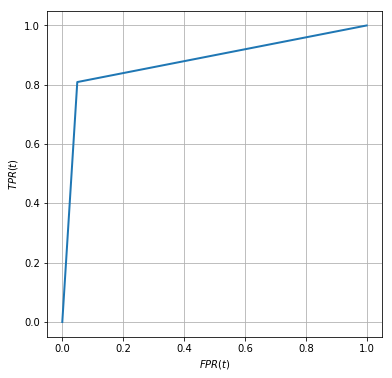

In [26]:
thresholds = np.linspace(2,-2,105)

ROC = np.zeros((105,2))

for i in range(105):
    t = thresholds[i]

    TP_t = np.logical_and( y_pred > t, test_y==1 ).sum()
    TN_t = np.logical_and( y_pred <=t, test_y==0 ).sum()
    FP_t = np.logical_and( y_pred > t, test_y==0 ).sum()
    FN_t = np.logical_and( y_pred <=t, test_y==1 ).sum()


    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

# Plot the ROC curve.
fig = plt.figure(figsize=(6,6))
plt.plot(ROC[:,0], ROC[:,1], lw=2)
plt.xlabel('$FPR(t)$')
plt.ylabel('$TPR(t)$')
plt.grid()

In [27]:
AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5
AUC

0.8799408341652261

In [28]:
np.mean(test_y == y_pred)

0.8830865159781761